In [1]:
import torch
from torch import nn
from d2l import torch as d2l
from train_ch3 import train_ch3

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

工具函数加载完成！


初始化模型参数:实现一个具有单隐藏层的多层感知机，它包含256个隐藏单元

In [2]:
# 256是位于784和10之间的一个数
num_inputs, num_outputs, num_hiddens = 784, 10, 256
# torch.randn(): 生成符合标准正态分布的随机数
# requires_grad=True: 告诉PyTorch这个参数需要计算梯度（用于反向传播）
# 这里的随机初始化只在开始时进行一次，不是在训练过程中不断随机！
#如果不用随机初始化会怎样？所有神经元会学到完全相同的特征，失去了多样性，网络无法有效学习。
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True)*0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs,requires_grad=True)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

params = [W1,b1,W2,b2]

```
num_inputs = 784  # 28*28 = 784

# 原始图像数据可能有不同的形状：
batch1 = torch.randn(32, 28, 28)      # 32张28x28的图片
batch2 = torch.randn(64, 1, 28, 28)   # 64张单通道28x28的图片  
batch3 = torch.randn(16, 784)         # 16张已经展平的图片

# 使用reshape(-1, 784)：
print("原始形状 -> 重塑后形状")
print(f"{batch1.shape} -> {batch1.reshape(-1, 784).shape}")  # (32,28,28) -> (32,784)
print(f"{batch2.shape} -> {batch2.reshape(-1, 784).shape}")  # (64,1,28,28) -> (64,784)  
print(f"{batch3.shape} -> {batch3.reshape(-1, 784).shape}")  # (16,784) -> (16,784)

# 例子1: (32, 28, 28) -> (-1, 784)
总元素数 = 32 * 28 * 28 = 25088
-1的值 = 25088 ÷ 784 = 32
结果: (32, 784)

实现ReLU激活函数

In [3]:
def relu(X):
    a = torch.zeros_like(X) # 创建一个与X形状相同的全零张量
    return torch.max(X, a) # 逐元素比较，返回X和0中的较大值

```
实现我们的模型
net(X)是前向传播
def net(X0):                        # 明确标记为X₀
    X0 = X0.reshape((-1, num_inputs))  # 预处理X₀
    X1 = relu(X0@W1 + b1)          # 隐藏层输出X₁
    X2 = X1@W2 + b2                # 输出层输出X₂
    return X2                       # 返回最终结果

In [4]:
def net(X):
    X = X.reshape((-1, num_inputs))    # 重塑输入形状
    H = relu(X@W1 + b1)    # 隐藏层：线性变换 + ReLU激活 @就相当于*号
    return (H@W2 + b2)     # 输出层：线性变换    

loss = nn.CrossEntropyLoss()    

多层感知机的训练过程与softmax回归的训练过程完全相同

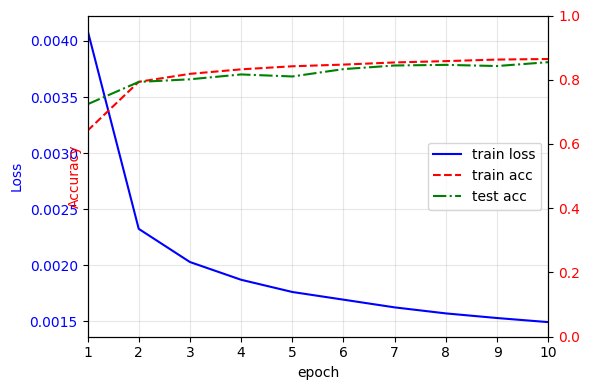

epoch 10, loss 0.001, train acc 0.865, test acc 0.855

训练完成！最终结果：
训练损失: 0.001
训练准确率: 0.865
测试准确率: 0.855


In [5]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)